## IMAGE SELECTION

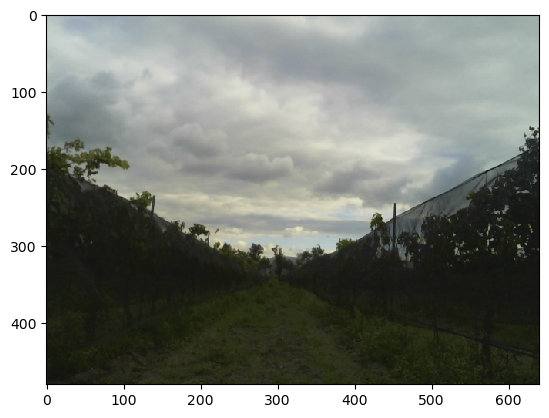

In [11]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
import math

img = cv2.imread("test_images/20221002-223527.jpg")
img = cv2.imread("test_images/20221002-223338.jpg")
#cv2.imshow("original",img)
#cv2.waitKey(0)
#cv2.destroyAllWindows()

original = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) #Convertion to rgb in order to maintain the same colors in cv2 and pyplot
plt.imshow(original)
plt.show()
image=original


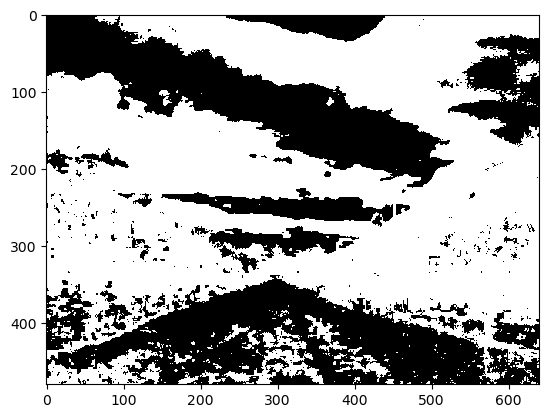

In [12]:

hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

min_color = np.array([0,0,0])
max_color = np.array([180,99,181])

colorMask = cv2.inRange(hsv, min_color, max_color)

image = cv2.cvtColor(colorMask, cv2.COLOR_BGR2RGB) 
plt.imshow(image)
plt.show()

(480, 640, 3)


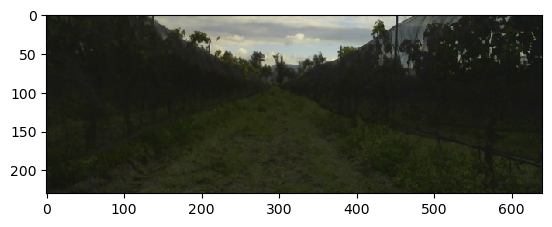

In [13]:
print(image.shape)
recortar = original[250:480,0:640]

plt.imshow(recortar)

#image=recortar

## Gray sacale transformation

(480, 640)

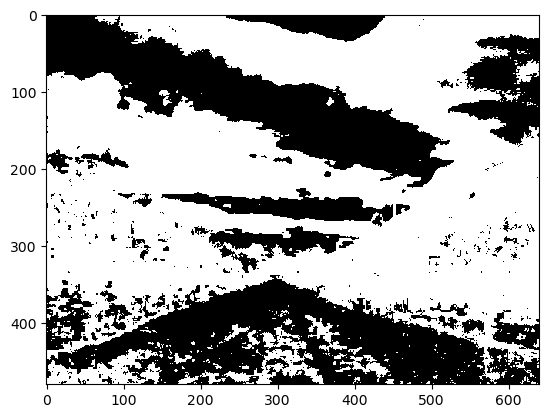

In [14]:
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
plt.imshow(gray,cmap='gray')
gray.shape


## Gray scale GExG

480 640
(480, 640, 3)


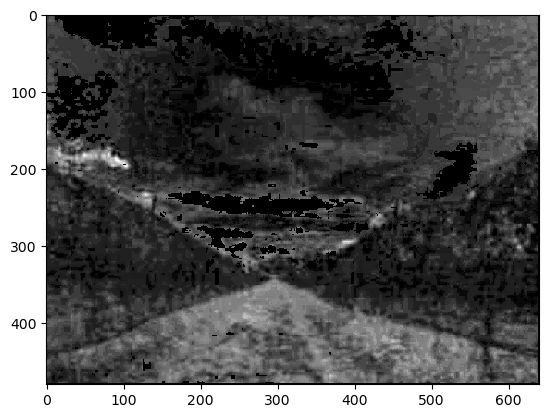

In [15]:
x,y,z = original.shape
print(x,y)
frame = np.zeros([x,y])
print(original.shape)
r = original[:,:,0]
g = original[:,:,1]
b = original[:,:,2]

x,y = r.shape

for i in range(x-1):
    for j in range (y-1):
        if g[i,j] < r[i,j] or g[i,j] < b[i,j]:
            frame[i,j] = 0
        else:
            frame[i,j] = 2*g[i,j]-r[i,j]-b[i,j]


frame = frame.astype('uint8')
plt.imshow(frame,cmap='gray')


## Otsu's Binarization

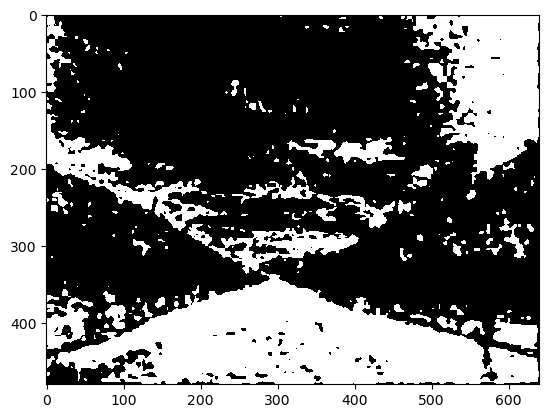

In [16]:
blur = cv2.GaussianBlur(frame,(5,5),0)
ret,otsu = cv2.threshold(blur,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
plt.imshow(otsu,cmap='gray')




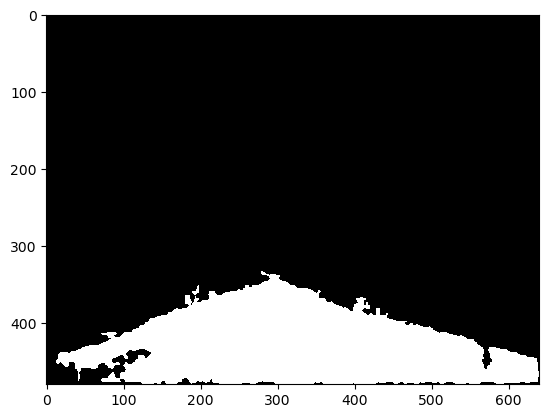

In [21]:
contours,hierarchy = cv2.findContours(otsu, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
output = otsu.copy()
maxContour = 0
for contour in contours:
    contourSize = cv2.contourArea(contour)
    if contourSize > maxContour:
        maxContour = contourSize
        maxContourData = contour

# Create a mask from the largest contour
mask = np.zeros_like(otsu)
mask = mask.astype('uint8')
mask=cv2.fillPoly(mask,[maxContourData],1)

plt.imshow(mask,cmap='gray')

## MORPHOLOGICAL OPERATIONS

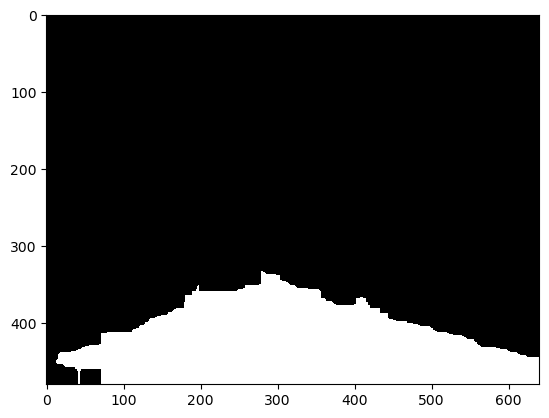

In [18]:
#Erosion
kernel = np.array([[1,1,1],[1,1,1],[1,1,1]])
closing = cv2.morphologyEx(mask,cv2.MORPH_CLOSE,kernel,iterations=10)
opening = cv2.morphologyEx(closing,cv2.MORPH_OPEN,kernel,iterations=10)
#closing = ~closing

plt.imshow(closing,cmap='gray')
plt.show()

## EDGE DETECTION

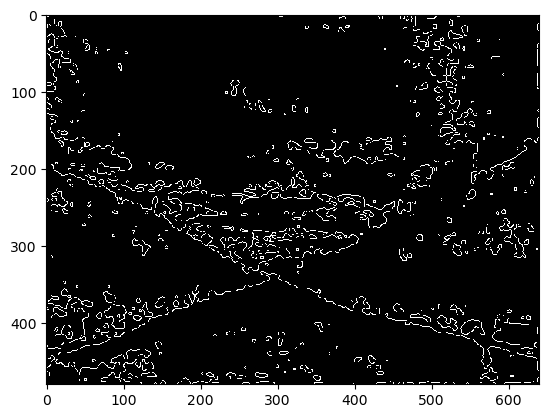

In [19]:
edges = cv2.Canny(otsu,50,150,apertureSize = 3)

plt.imshow(edges,cmap='gray')
plt.show()

## LINE DETECTION

line 0
line 1
line 2
line 3
line 4
line 5
line 6
line 7
line 8
line 9
line 10
line 11
line 12
line 13
line 14
line 15
line 16
line 17
line 18
line 19
line 20
line 21
line 22
line 23
line 24
line 25
line 26
line 27
line 28
line 29
line 30
line 31
line 32
line 33
line 34
line 35
line 36
line 37
line 38
line 39
line 40
line 41
line 42
line 43
line 44
line 45
line 46
line 47
line 48
line 49
line 50
line 51
line 52
line 53
line 54
line 55
line 56
line 57
line 58
line 59
line 60
line 61
line 62
line 63
line 64
line 65
line 66
line 67
line 68
line 69
line 70
line 71
line 72
line 73
line 74
line 75
line 76
line 77
line 78
line 79
line 80
line 81
line 82
line 83
line 84
line 85
line 86
line 87
line 88
line 89
line 90
line 91
line 92
line 93
line 94
line 95
line 96
line 97
line 98
line 99
line 100
line 101
line 102
line 103
line 104
line 105
line 106
line 107
line 108
line 109
line 110
line 111
line 112
line 113
line 114
line 115
line 116
line 117
line 118
line 119
line 120
line 121
line 122
lin

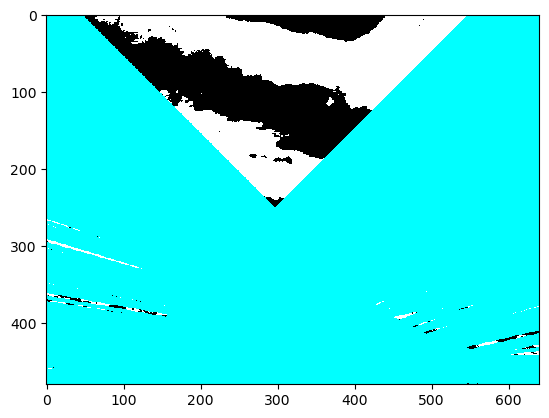

In [20]:
lines = cv2.HoughLines(closing,1,np.pi/180,200) 
if lines is not None:
    for i in range(0, len(lines)):
        rho = lines[i][0][0]
        theta = lines[i][0][1]
        a = math.cos(theta)
        b = math.sin(theta)
        x0 = a * rho
        y0 = b * rho
        pt1 = (int(x0 + 1000*(-b)), int(y0 + 1000*(a)))
        pt2 = (int(x0 - 1000*(-b)), int(y0 - 1000*(a)))
        cv2.line(image, pt1, pt2, (0,255,255), 3)
        print('line',i)
else:
    print("NO LINES DETECTED")
#cv2.imshow('houghlines',img)

plt.imshow(image)
plt.show()